In [6]:
from CNN import tCNN

### Getting Data

In [7]:
import pickle
with open('Data_simple.pkl', 'rb') as f:
    Final = pickle.load(f)
    
X = Final[0]
Y = Final[1]

### Random Shuffle

In [8]:
import random

XY = list(zip(X, Y))
random.shuffle(XY)

X, Y = zip(*XY)

Using TensorFlow backend.









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 10, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 8, 8, 64)     640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 8, 8, 64)     640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 8, 8, 64)     640         input_1[0][0]                    
__________________________________________________________________________________________________
max

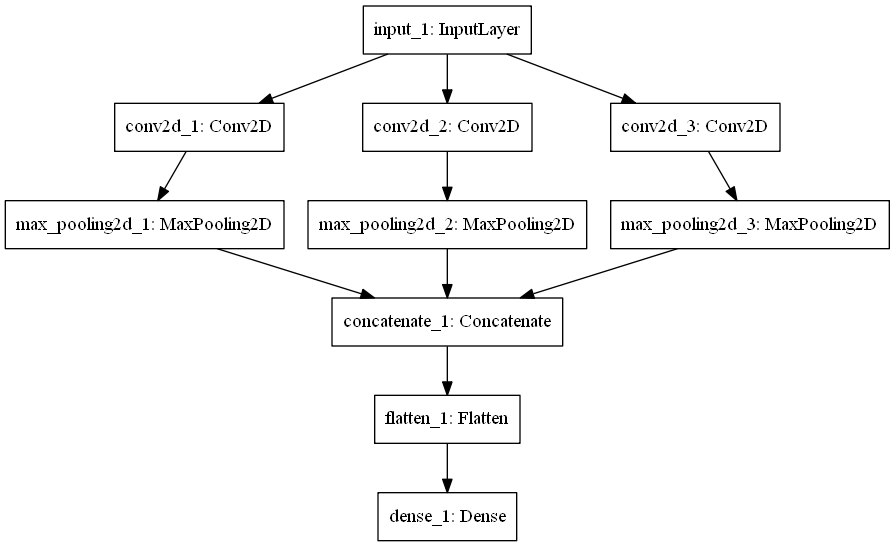

In [9]:
tCNN()


from keras.utils import plot_model
from IPython.display import Image
from keras.models import load_model

model = load_model('CNN_model_init.h5')
plot_model(model, to_file='CNN_arch.png')
Image(filename='./CNN_arch.png')

## Reshaping array

In [10]:
import numpy as np

X = np.asarray(X)
Y = np.asarray(Y)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = Y.reshape(Y.shape[0], 1)

print(f"X shape : {X.shape}\nY shape : {Y.shape}")

X shape : (169, 10, 10, 1)
Y shape : (169, 1)


In [11]:
x_train = X[0:140]
y_train = Y[0:140]

x_test = X[140:]
y_test = Y[140:]

### Training Model

In [12]:
# callback function
import keras
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

model.fit(x_train, y_train,
          epochs=1000,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[callback])

try:
    model.save('CNN_model_final.h5')
    print("Model Saved!")
except:
    print("Error in saving Model")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 140 samples, validate on 29 samples
Epoch 1/1000
140/140 [==============================] - 2s 12ms/step - loss: 1.9576 - acc: 0.1714 - val_loss: 1.7899 - val_acc: 0.2069
Epoch 2/1000
140/140 [==============================] - 0s 652us/step - loss: 1.7148 - acc: 0.3500 - val_loss: 1.6745 - val_acc: 0.5517
Epoch 3/1000
140/140 [==============================] - 0s 602us/step - loss: 1.5463 - acc: 0.6500 - val_loss: 1.5536 - val_acc: 0.7931
Epoch 4/1000
140/140 [==============================] - 0s 675us/step - loss: 1.3979 - acc: 0.8571 - val_loss: 1.4231 - val_acc: 0.7931
Epoch 5/1000
140/140 [==============================] - 0s 708us/step - loss: 1.2643 - acc: 0.8357 - val_loss: 1.3322 - val_acc: 0.8621
Epoch 6/1000
140/140 [==============================] - 0s 662us/step - loss: 1.1480 - acc: 0.9429 - val_loss: 1.2535 - val_acc: 0.8621

Reached 90% accuracy so cancelling training!


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[1.2535083293914795, 0.8620689511299133]

In [14]:
classes = model.predict(x_test)
print(classes)

[[1.03575975e-01 1.37080044e-01 3.42839360e-02 1.95282310e-01
  1.03193648e-01 2.42604226e-01 6.97656795e-02 1.14214160e-01]
 [1.15498833e-01 3.99179727e-01 1.57519728e-02 1.86984390e-01
  6.12326711e-02 7.65261874e-02 3.32535245e-02 1.11572638e-01]
 [1.44745365e-01 1.16077006e-01 6.71408400e-02 1.61808416e-01
  8.78761783e-02 1.74393132e-01 1.20285287e-01 1.27673775e-01]
 [1.66242868e-01 1.16626360e-01 2.70170700e-02 2.99165756e-01
  1.00386821e-01 1.16841950e-01 5.88471666e-02 1.14872046e-01]
 [1.50949910e-01 8.87439325e-02 6.92611337e-02 1.72873020e-01
  8.85452852e-02 1.79585800e-01 1.18154965e-01 1.31885916e-01]
 [1.37007892e-01 1.06137551e-01 3.46263088e-02 2.96613365e-01
  8.42659473e-02 1.54952750e-01 6.45318329e-02 1.21864393e-01]
 [1.24051936e-01 1.20460682e-01 3.67738004e-03 1.46128848e-01
  3.02312791e-01 5.90155646e-02 1.29464418e-01 1.14888430e-01]
 [1.14461824e-01 7.70786032e-02 2.08510067e-02 1.58588052e-01
  8.82927626e-02 4.05361742e-01 5.88381030e-02 7.65278786e-02]


In [15]:
classes.shape

(29, 8)

In [16]:
x_test.shape

(29, 10, 10, 1)

In [17]:
y_test[0]

array([5])